<a href="https://colab.research.google.com/github/hellojohnkim/mmai2024/blob/main/Team_Assignment_MMAI863.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MMAI-863 Mathematics for AI Team Assignment - Chester**

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# 0. Data preparation

In [1]:
wine_quality = pd.read_csv("winequality-white.csv",sep=';')
# Step for converting white space in columns to _ value for better handling

NameError: ignored

In [ ]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Step for converting white space in columns to _ value for better handling

In [ ]:
wine_quality.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [ ]:
wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 1. Multiple Linear Regression

## 1.1 Check relationships between variables

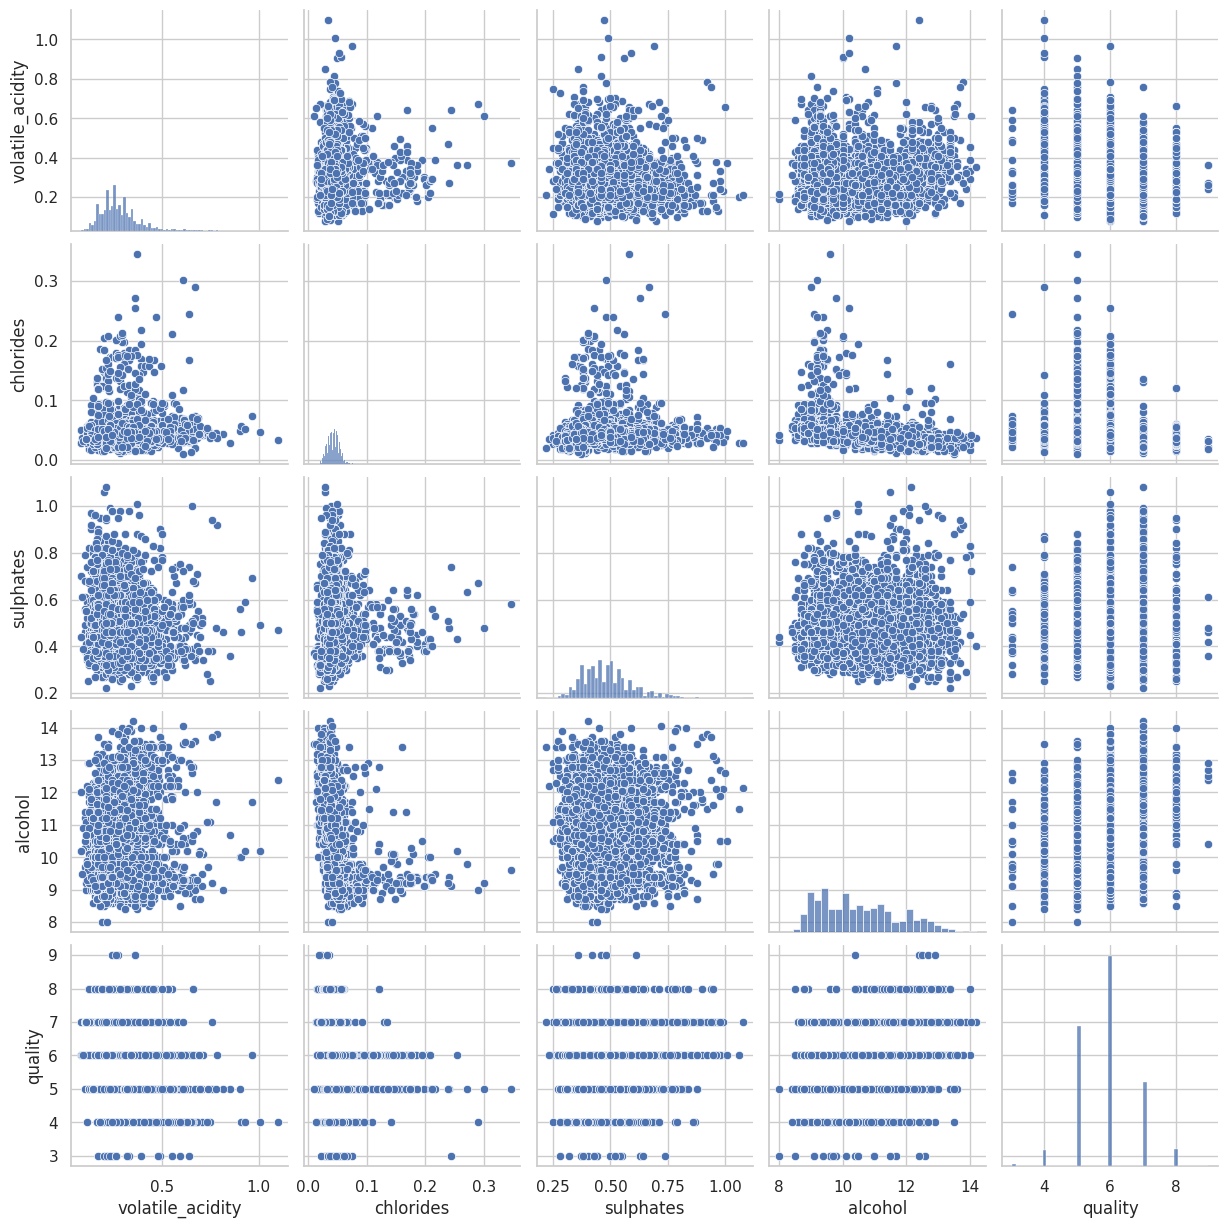

In [ ]:
# Plots - pair plots
eda_colnms = [ 'volatile_acidity',  'chlorides', 'sulphates', 'alcohol','quality']
sns.set(style='whitegrid',context = 'notebook')
sns.pairplot(wine_quality[eda_colnms],height = 2.5,x_vars= eda_colnms,y_vars=eda_colnms)
plt.show()

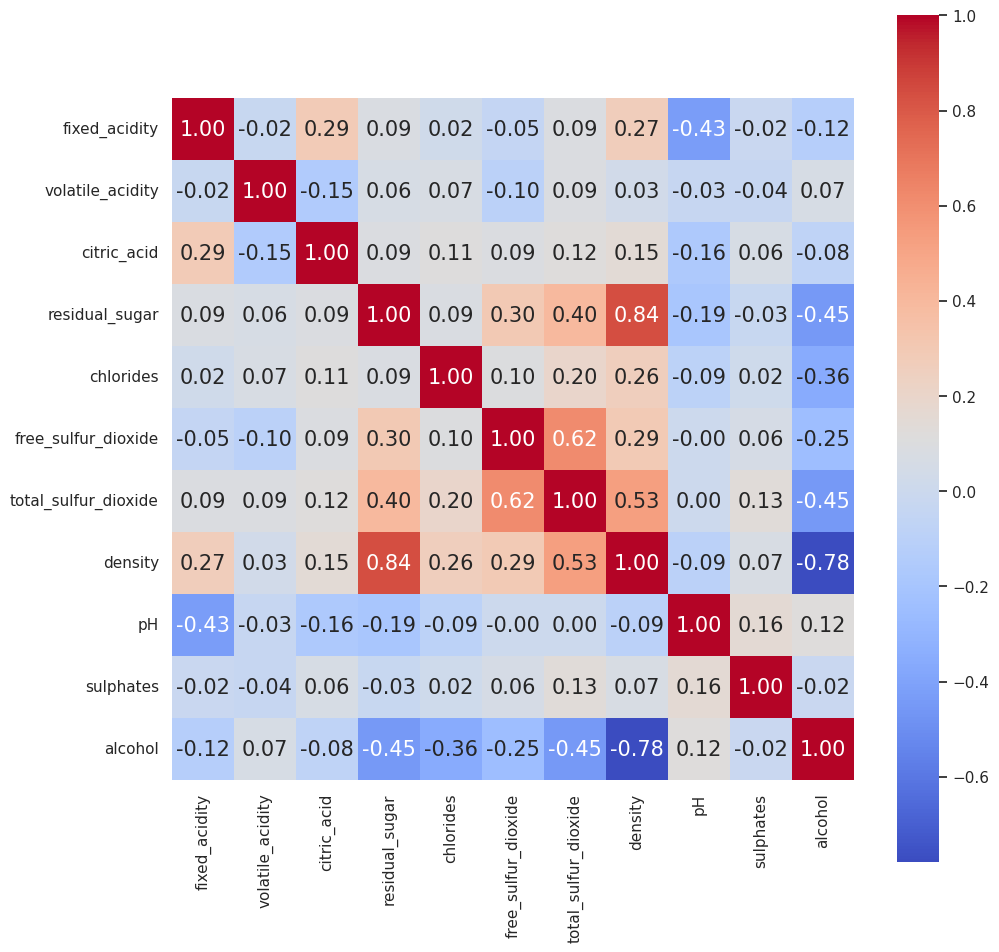

In [ ]:
colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']

# Correlation coefficients
corr_mat = np.corrcoef(wine_quality[colnms].values.T)
sns.set(font_scale=1)
sns.set(rc={"figure.figsize":(11, 11)})
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True,
fmt='.2f',annot_kws={'size': 15}, yticklabels=colnms, cmap="coolwarm",
xticklabels=colnms)
plt.show()

## 1.2 Model fitting

In [ ]:
pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

print("wine_quality type= ", type(wine_quality))
print("pdx type= ", type(pdx))
print("pdy type= ", type(pdy))

wine_quality type=  <class 'pandas.core.frame.DataFrame'>
pdx type=  <class 'pandas.core.frame.DataFrame'>
pdy type=  <class 'pandas.core.series.Series'>


In [ ]:
pdx.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [ ]:
pdy.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)

#random.seed(434)
full_mod = sm.OLS(y_train,x_train_new)
full_res = full_mod.fit()
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     124.7
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          8.20e-241
Time:                        22:06:45   Log-Likelihood:                -3895.2
No. Observations:                3428   AIC:                             7814.
Df Residuals:                    3416   BIC:                             7888.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  131.0

In [ ]:
y_pred_new = full_res.predict(x_test_new)
mse_OLS_all_variables = mean_squared_error(y_test, y_pred_new)
test_r2 = r2_score(y_test, y_pred_new)

print("mse_OLS_all_variables:",round(mse_OLS_all_variables,4))
print(f"Test R-squared value: {test_r2:.4f}")

mse_OLS_all_variables: 0.5543
Test R-squared value: 0.2659


## 1.3 Backward Elimination

Backward selection is explained in Dangeti, Backward and Forward selection.

In the backward method, iterations start with considering all the variables and we will remove variables one by one until all the prescribed statistics are met (such as no insignificance and multi-collinearity, and so on).

Varialbles are removed according to a selection criteria.  This criteria can be: high p-value (not significant), no impact on mse or $R^2$, etc.

### 1.3.1 Elimination of variables with high p-values

In [ ]:
colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


for i in np.arange(len(colnms)):
    pdx = wine_quality[colnms]
    pdy = wine_quality["quality"]

    x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
    x_train_new = sm.add_constant(x_train)
    x_test_new = sm.add_constant(x_test)

    #random.seed(434)
    full_mod = sm.OLS(y_train,x_train_new)
    full_res = full_mod.fit()

    y_pred_new = full_res.predict(x_test_new)
    mse_full_res = mean_squared_error(y_test, y_pred_new)


    if np.amax(full_res.pvalues) > 0.05:
        pop_par = full_res.pvalues.keys()[np.where(full_res.pvalues.values == np.amax(full_res.pvalues.values))[0][0]]
        print("\n","Step:",i+1,"Coefficient Removed:",pop_par,"p-value:",np.amax(full_res.pvalues),"mse:",mse_full_res, "aic:",full_res.aic)
        colnms.pop(np.where(full_res.pvalues.values == np.amax(full_res.pvalues.values))[0][0]-1)
    else:
        break


 Step: 1 Coefficient Removed: total_sulfur_dioxide p-value: 0.7080127764741386 mse: 0.5542927330136751 aic: 7814.467261154496

 Step: 2 Coefficient Removed: chlorides p-value: 0.665638147854849 mse: 0.5544462324396213 aic: 7812.608044477496

 Step: 3 Coefficient Removed: citric_acid p-value: 0.4745798999783625 mse: 0.5540760907108231 aic: 7810.79541985124


In [ ]:
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     171.5
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          6.02e-244
Time:                        22:06:45   Log-Likelihood:                -3895.7
No. Observations:                3428   AIC:                             7809.
Df Residuals:                    3419   BIC:                             7865.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 132.4110

### 1.3.2 Elimination of variables with high VIFs

The preceding code calculates the 'Inflation Factor', a measure of multi-collinearity:  please see Dangeti, Assumptions of linear regression.

VIF is calculated for each independent variable by calculating the R-squared value with respect to all the other independent variables and tries to eliminate which variable has the highest VIF value one by one:

$$VIF=\frac{1}{1-R^2}$$

If VIF <= 5 suggests no multi-collinearity, in banking scenarios, people use VIF <= 2 also!

In [ ]:
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
fixed_acidity 2.495
volatile_acidity 1.062
residual_sugar 11.42
free_sulfur_dioxide 1.162
density 24.054
pH 2.062
sulphates 1.124
alcohol 6.829


Remove the variables with VIF $> 5$, one by one, starting from the one with the largest VIF.

In [ ]:
print(f"Started from MSE = {mean_squared_error(y_test, full_res.predict(x_test_new))}, AIC = {full_res.aic}\n")

cols = list(colnms)

while len(cols) > 1:
    j = 1
    vifs = {}

    for i in np.arange(len(cols)):
        xvars = list(cols)
        yvar = xvars.pop(i)
        mod = sm.OLS(x_train[yvar], sm.add_constant(x_train[xvars]))
        res = mod.fit()
        vifs.update({yvar: 1/(1-res.rsquared)})
        # print(yvar, round(vif, 3))

    if max(vifs.values()) > 5:
        pop_par = max(vifs, key=vifs.get)
        cols.pop(cols.index(pop_par))
        pdx = wine_quality[cols]
        x_train_2, x_test_2, y_train, y_test = train_test_split(pdx, pdy, train_size = 0.7, random_state=42)
        x_train_2 = sm.add_constant(x_train_2)
        x_test_2 = sm.add_constant(x_test_2)

        new_mod = sm.OLS(y_train, x_train_2)
        new_res = new_mod.fit()
        y_pred_2 = new_res.predict(x_test_2)
        mse_new_res = mean_squared_error(y_test, y_pred_2)

        print(f"Step {j}: Coefficient Removed: {pop_par}, its VIF: {vifs.get(pop_par)}. After removal, MSE: {mse_new_res}, AIC: {new_res.aic}")
    else:
        print("\nVIFs after elimating those greater than 5:")
        for vif in vifs:
            print(f"{vif}: {vifs[vif]}")
        break

Started from MSE = 0.5534934202757059, AIC = 7809.308283198406

Step 1: Coefficient Removed: density, its VIF: 24.054485394556302. After removal, MSE: 0.5645770870846243, AIC: 7847.616805072298

VIFs after elimating those greater than 5:
fixed_acidity: 1.2411964284966581
volatile_acidity: 1.0291728963337448
residual_sugar: 1.3794054920173557
free_sulfur_dioxide: 1.1589033029046985
pH: 1.298043972114683
sulphates: 1.0358126058152852
alcohol: 1.3006920857946338


## 1.4 Model summary

In [ ]:
# final model summary
print ("\n \n", new_res.summary())

# mean_squared_error
print ("\nTest MSE value:",round(mse_new_res, 4))
# R squared value
print(f"Training R-squared value: {new_res.rsquared_adj:.4f}")
test_r2_new = r2_score(y_test, y_pred_2)
print(f"Test R-squared value: {test_r2_new:.4f}")


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     188.1
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          2.08e-236
Time:                        22:06:46   Log-Likelihood:                -3915.8
No. Observations:                3428   AIC:                             7848.
Df Residuals:                    3420   BIC:                             7897.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.7702

# 2. Ridge Regression

## 2.1 Rough grid search for alpha values

In [ ]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)

alphas = [10 ** deg for deg in range(-4, 2, 1)]

initrsq = [0]
ridge_alpha=[]
ridge_test_rsq=[]
ridge_mse = []

# print ("\nRidge Regression: Best Parameters\n")
for alph in alphas:
    ridge_reg = Ridge(alpha=alph)
    ridge_reg.fit(x_train,y_train)
    tr_rsqrd = ridge_reg.score(x_train,y_train)
    ts_rsqrd = ridge_reg.score(x_test,y_test)
    ridge_y_test_pred=ridge_reg.predict(x_test)
    mse = mean_squared_error(y_test, ridge_y_test_pred)

    # print("alpha",alph,"   test R2",ts_rsqrd, "   MSE =", mse)
    print(f"alpha: {alph}{' ' * (10 - len(str(alph)))}test R2: {ts_rsqrd:.10f}     MSE: {mse:.10f}")
    ridge_alpha.append(alph)
    ridge_test_rsq.append(ts_rsqrd)
    ridge_mse.append(mse)

    if ts_rsqrd > initrsq:
        print ("Lambda: ",alph,"Train R-Squared value:",round(tr_rsqrd,5),"Test R-squared value:",round(ts_rsqrd,5),"Test MSE:",mse)
        initrsq = ts_rsqrd
        best_alpha = alph

alpha: 0.0001    test R2: 0.2653104849     MSE: 0.5547142133
Lambda:  0.0001 Train R-Squared value: 0.28653 Test R-squared value: 0.26531 Test MSE: 0.5547142133337616
alpha: 0.001     test R2: 0.2616719234     MSE: 0.5574614443
alpha: 0.01      test R2: 0.2555095219     MSE: 0.5621142557
alpha: 0.1       test R2: 0.2538820331     MSE: 0.5633430620
alpha: 1         test R2: 0.2537816240     MSE: 0.5634188742
alpha: 10        test R2: 0.2535518335     MSE: 0.5635923734


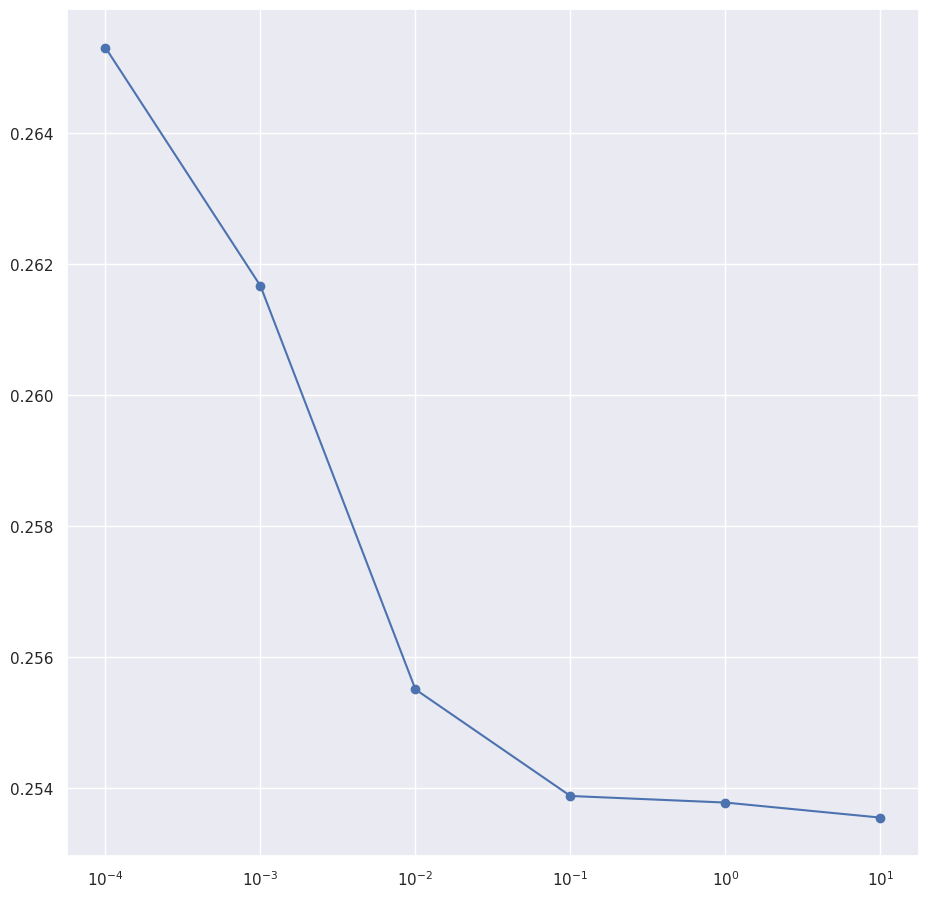

In [ ]:
plt.scatter(ridge_alpha,ridge_test_rsq)
plt.plot(ridge_alpha,ridge_test_rsq)
plt.semilogx(base=10)
plt.show()

## 2.2 Choose the alpha value yielding the best predicting model

In [ ]:
# Coeffients of Ridge regression of best alpha value

alpha = 1e-4
ridge_reg = Ridge(alpha= alpha)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.0001)

## 2.3 Model summary

In [ ]:
print ("\nRidge Regression coefficient values of Alpha =",alpha,"\n")
longest = max(all_colnms, key=lambda x: len(x))
for i in range(11):
    # print (all_colnms[i],": ",ridge_reg.coef_[i])
    print(f"{all_colnms[i]} :{' ' * (len(longest) - len(all_colnms[i]) + 2)}{ridge_reg.coef_[i]:.20f}")


Ridge Regression coefficient values of Alpha = 0.0001 

fixed_acidity :         0.04447884081530692479
volatile_acidity :      -1.93604014895161324894
citric_acid :           -0.08870675229782980231
residual_sugar :        0.07089680141939525004
chlorides :             0.23816003252303297177
free_sulfur_dioxide :   0.00469789925253798462
total_sulfur_dioxide :  -0.00020806906962054928
density :               -121.26085912125320476207
pH :                    0.61147247177155028552
sulphates :             0.67690841409369961745
alcohol :               0.23733945389606014853


In [ ]:
ridge_y_test_pred=ridge_reg.predict(x_test)

# R-square calculation
rsqd = r2_score(y_test, ridge_y_test_pred)
print ("\nTest R-squared value:",round(rsqd,4))

#mean_squared_error
mse = mean_squared_error(y_test, ridge_y_test_pred)
print("\nTest MSE value:",round(mse,4))


Test R-squared value: 0.2653

Test MSE value: 0.5547


# 3. Lasso Regression

## 3.1 Rough grid search for alpha values

In [ ]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)

alphas = [10 ** deg for deg in range(-4, 2, 1)]
initrsq = 0
print ("\nLasso Regression: Best Parameters\n")

initrsq = [0]
lasso_alpha=[]
lasso_test_rsq=[]
lasso_mse = []

for alph in alphas:
    lasso_reg = Lasso(alpha=alph)
    lasso_reg.fit(x_train,y_train)
    tr_rsqrd = lasso_reg.score(x_train,y_train)
    ts_rsqrd = lasso_reg.score(x_test,y_test)
    lasso_y_test_pred=lasso_reg.predict(x_test)
    mse = mean_squared_error(y_test, lasso_y_test_pred)

    # print("alpha",alph,"   test R2",ts_rsqrd, "   MSE =", mse)
    print(f"alpha: {alph}{' ' * (10 - len(str(alph)))}test R2: {ts_rsqrd}     MSE: {mse}")
    lasso_alpha.append(alph)
    lasso_test_rsq.append(ts_rsqrd)
    lasso_mse.append(mse)


    if ts_rsqrd > initrsq:
        print ("Lambda: ",alph,"Train R-Squared value:",round(tr_rsqrd,5),"Test R-squared value:",round(ts_rsqrd,5),"Test MSE:",mse)
        initrsq = ts_rsqrd



Lasso Regression: Best Parameters

alpha: 0.0001    test R2: 0.25335093546260745     MSE: 0.5637440578448418
Lambda:  0.0001 Train R-Squared value: 0.27882 Test R-squared value: 0.25335 Test MSE: 0.5637440578448418
alpha: 0.001     test R2: 0.2545765977506387     MSE: 0.5628186433969845
Lambda:  0.001 Train R-Squared value: 0.2784 Test R-squared value: 0.25458 Test MSE: 0.5628186433969845
alpha: 0.01      test R2: 0.24492793942885804     MSE: 0.5701036907551421
alpha: 0.1       test R2: 0.20013673470105287     MSE: 0.6039224909228712
alpha: 1         test R2: 0.04739580078497285     MSE: 0.719246808563598
alpha: 10        test R2: -0.0011619661806652193     MSE: 0.7559094843630426


## 3.2 Choose the alpha value yielding the best predicting model

In [ ]:
# Coeffients of Lasso regression of best alpha value
alpha = 0.001
lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.001)

## 3.3 Model summary

In [ ]:
print ("\nLasso Regression coefficient values of Alpha =",alpha,"\n")
longest = max(all_colnms, key=lambda x: len(x))
for i in range(11):
    # print (all_colnms[i],": ",lasso_reg.coef_[i])
    print(f"{all_colnms[i]} :{' ' * (len(longest) - len(all_colnms[i]) + 2)}{lasso_reg.coef_[i]}")


Lasso Regression coefficient values of Alpha = 0.001 

fixed_acidity :         -0.05502612372373451
volatile_acidity :      -1.9283268117005787
citric_acid :           -0.048387311253574435
residual_sugar :        0.02433495191194041
chlorides :             -0.0
free_sulfur_dioxide :   0.005701490105325005
total_sulfur_dioxide :  -0.0007218957947853124
density :               -0.0
pH :                    0.14510628340397774
sulphates :             0.427881704951357
alcohol :               0.37259062844793


In [ ]:
lasso_y_test_pred=lasso_reg.predict(x_test)

# R-square calculation
rsqd = r2_score(y_test, lasso_y_test_pred)
print ("\nTest R-squared value:",round(rsqd,4))

#mean_squared_error
mse = mean_squared_error(y_test, lasso_y_test_pred)
print ("\nTest MSE value:",round(mse,4))


Test R-squared value: 0.2546

Test MSE value: 0.5628


# 4. Comparison

## 4.1 MSE vs. alpha (lambda) for the two ML models, Lasso and Ridge

In [ ]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
alphas = [1e-4, 2e-4, 5e-4,1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 0.1, 0.5, 1.0, 5.0, 10, 20]
initrsq = 0

lasso_mse_train = []
lasso_mse_test = []

ridge_mse_train = []
ridge_mse_test = []

for alph in alphas:
        lasso_reg = Lasso(alpha=alph)
        lasso_reg.fit(x_train,y_train)

        lasso_y_train_pred = lasso_reg.predict(x_train)
        lasso_y_test_pred = lasso_reg.predict(x_test)

        ridge_reg = Ridge(alpha=alph)
        ridge_reg.fit(x_train,y_train)

        ridge_y_train_pred = ridge_reg.predict(x_train)
        ridge_y_test_pred = ridge_reg.predict(x_test)

        #Calculate quality of predictors

        tr_lasso_mse = mean_squared_error(y_train, lasso_y_train_pred)
        ts_lasso_mse = mean_squared_error(y_test, lasso_y_test_pred)

        tr_ridge_mse = mean_squared_error(y_train, ridge_y_train_pred)
        ts_ridge_mse = mean_squared_error(y_test, ridge_y_test_pred)

        #append quality metrics

        lasso_mse_train.append(tr_lasso_mse)
        lasso_mse_test.append(ts_lasso_mse)

        ridge_mse_train.append(tr_ridge_mse)
        ridge_mse_test.append(ts_ridge_mse)





In [ ]:
zipped = list(zip(alphas, lasso_mse_train,lasso_mse_test,ridge_mse_train,ridge_mse_test))
df = pd.DataFrame(zipped, columns=['lambda', 'lasso_mse_train','lasso_mse_test','ridge_mse_train','ridge_mse_test'])
print(df)

     lambda  lasso_mse_train  lasso_mse_test  ridge_mse_train  ridge_mse_test
0    0.0001         0.574373        0.563744         0.568237        0.554714
1    0.0002         0.574411        0.563815         0.568323        0.555112
2    0.0005         0.574476        0.563397         0.568718        0.556155
3    0.0010         0.574708        0.562819         0.569444        0.557461
4    0.0020         0.575470        0.562258         0.570566        0.559080
5    0.0050         0.579716        0.563633         0.572167        0.561069
6    0.0100         0.589762        0.570104         0.573079        0.562114
7    0.0200         0.620616        0.595191         0.573658        0.562756
8    0.0500         0.625008        0.597327         0.574057        0.563189
9    0.1000         0.633311        0.603922         0.574200        0.563343
10   0.5000         0.758293        0.714616         0.574329        0.563452
11   1.0000         0.765291        0.719247         0.574376   

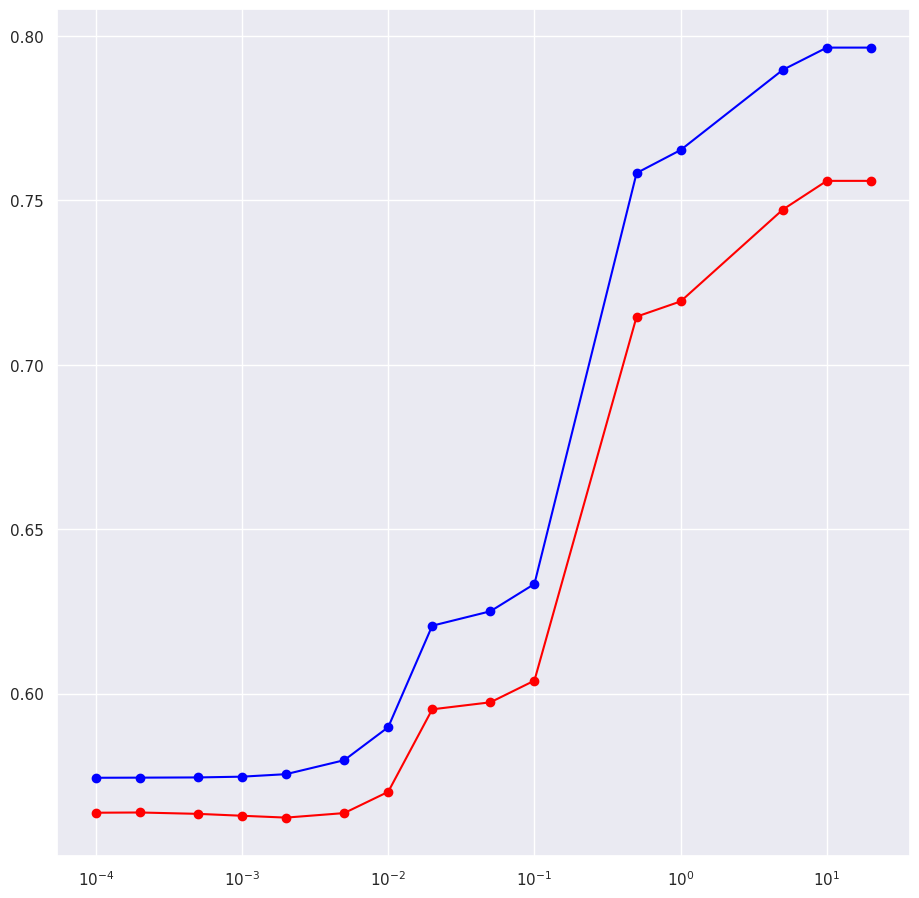

In [ ]:
plt.plot(alphas,lasso_mse_train,color='blue')
plt.scatter(alphas,lasso_mse_train,color='blue')
plt.plot(alphas,lasso_mse_test,color='red')
plt.scatter(alphas,lasso_mse_test,color='red')
plt.semilogx(base=10)
plt.show()

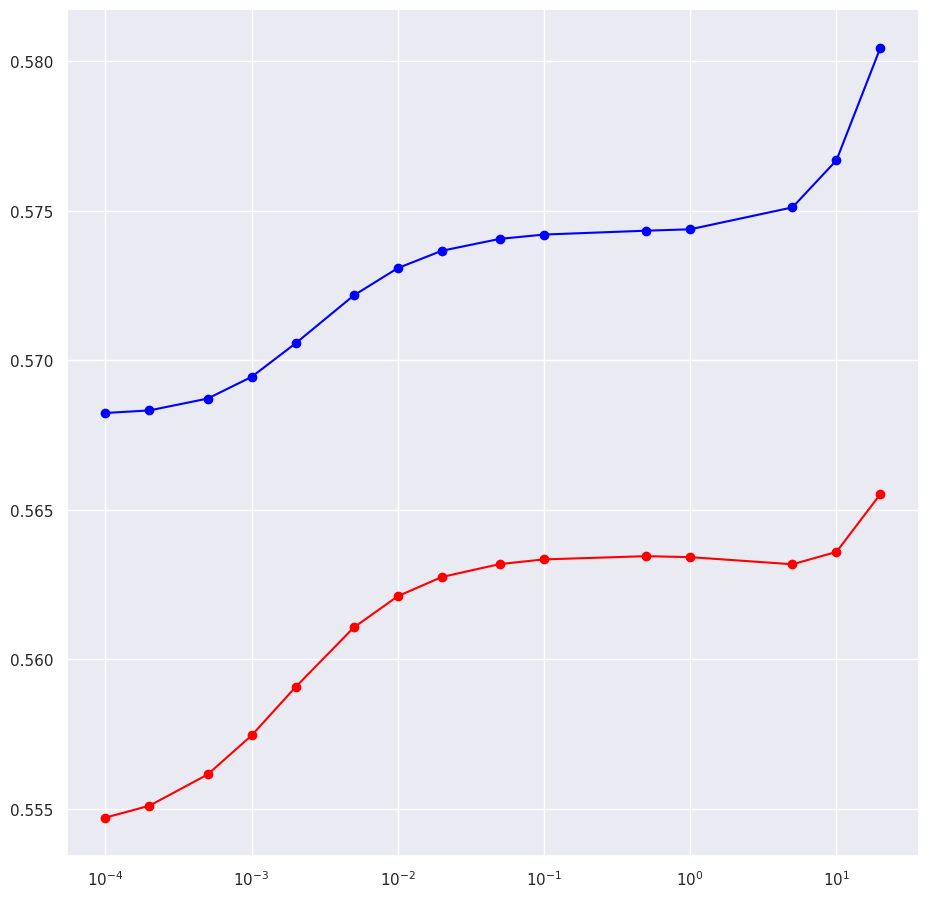

In [ ]:
plt.plot(alphas,ridge_mse_train,color='blue')
plt.scatter(alphas,ridge_mse_train,color='blue')
plt.plot(alphas,ridge_mse_test,color='red')
plt.scatter(alphas,ridge_mse_test,color='red')
plt.semilogx(base=10)
plt.show()

## 4.2 Which model would you choose?

The code allows you to calculate the metrics for different $\alpha$ values.  Please use the tables provided above as a guideline on what range to explore, you can 'zoom in' with the code provided below.

### 4.2.1 Ridge regression final model

In [ ]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Coeffients of Lasso regression
ridge_reg = Ridge(alpha=1e-4)
ridge_reg.fit(x_train,y_train)

ridge_y_test_pred = ridge_reg.predict(x_test)

print ("\nRidge Regression coefficient values of Alpha = 0.0001\n")
for i in range(11):
    # print (all_colnms[i],": ",ridge_reg.coef_[0][i])
    print(f"{all_colnms[i]} :{' ' * (len(longest) - len(all_colnms[i]) + 2)}{ridge_reg.coef_[0][i]:.20f}")

print("\n \n mse =", round(mean_squared_error(y_test, ridge_y_test_pred),4))
print(f" r2 = {ridge_reg.score(x_test, y_test):.4f}")


Ridge Regression coefficient values of Alpha = 0.0001

fixed_acidity :         0.04447884081530692479
volatile_acidity :      -1.93604014895161324894
citric_acid :           -0.08870675229782980231
residual_sugar :        0.07089680141939525004
chlorides :             0.23816003252303297177
free_sulfur_dioxide :   0.00469789925253798462
total_sulfur_dioxide :  -0.00020806906962054928
density :               -121.26085912125320476207
pH :                    0.61147247177155028552
sulphates :             0.67690841409369961745
alcohol :               0.23733945389606014853

 
 mse = 0.5547
 r2 = 0.2653


### 4.2.2 Lasso regression final model

In [ ]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Coeffients of Lasso regression
lasso_reg = Lasso(alpha=0.002)
lasso_reg.fit(x_train,y_train)

lasso_y_test_pred = lasso_reg.predict(x_test)

print ("\nLasso Regression coefficient values of Alpha = 0.002\n")
for i in range(11):
    # print (all_colnms[i],": ",lasso_reg.coef_[i])
    print(f"{all_colnms[i]} :{' ' * (len(longest) - len(all_colnms[i]) + 2)}{lasso_reg.coef_[i]:.20f}")

print("\n \n mse =", round(mean_squared_error(y_test, lasso_y_test_pred),4))
print(f" r2 = {lasso_reg.score(x_test, y_test):.4f}")


Lasso Regression coefficient values of Alpha = 0.002

fixed_acidity :         -0.05831310578394050675
volatile_acidity :      -1.82223594652255549420
citric_acid :           -0.00000000000000000000
residual_sugar :        0.02358563445948672066
chlorides :             -0.00000000000000000000
free_sulfur_dioxide :   0.00582576163837073089
total_sulfur_dioxide :  -0.00075668827046192395
density :               -0.00000000000000000000
pH :                    0.10619817356905597583
sulphates :             0.35830499274072730165
alcohol :               0.37039003738203413185

 
 mse = 0.5623
 r2 = 0.2553


### 4.2.3 Multiple linear regression simplified and full model

In [ ]:
print("OLS backward elimination parameters\n\n",new_res.params,"\n\n MSE = ",round(mse_new_res,4))
print(f"Test R-squared value: {test_r2_new:.4f}")

OLS backward elimination parameters

 const                  1.770183
fixed_acidity         -0.059805
volatile_acidity      -2.067558
residual_sugar         0.024257
free_sulfur_dioxide    0.004623
pH                     0.168243
sulphates              0.468308
alcohol                0.380801
dtype: float64 

 MSE =  0.5646
Test R-squared value: 0.2522


In [ ]:
print("mse_OLS_all_variables:",round(mse_OLS_all_variables,4))
print(f"Test R-squared value: {test_r2:.4f}")

mse_OLS_all_variables: 0.5543
Test R-squared value: 0.2659


If you apply the code provided in class to check if the parametric assumptions are met, and check the results, you can validate that when parametric conditions are met, it is a very efficient method.  Keep in mind that in real life applications, a full OLS or a backward elimination maybe too expensive computationally.